In [99]:
#repo https://github.com/CVandermies/AI_introduction

import gzip
import numpy as np
import struct
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [100]:
# 2.1
# format unsigned (B), big endian (>)

with gzip.open('./data/train-images-idx3-ubyte.gz', 'rb') as file:
    buf = file.read()
size = 60000*28*28
image_DS = np.array(struct.unpack_from('>{}B'.format(size), buf, 16), dtype = np.ubyte)

with gzip.open('./data/train-labels-idx1-ubyte.gz', 'rb') as file:
    buf = file.read()
label_DS = np.array(struct.unpack_from('>{}B'.format('60000'), buf, 8))

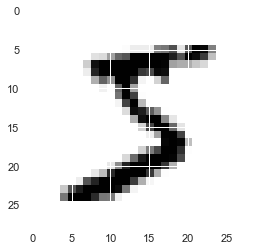

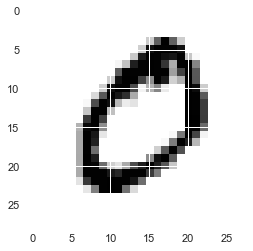

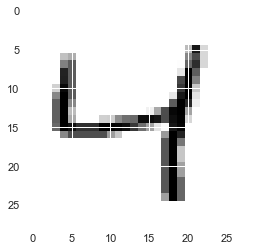

In [101]:
# 2.2
# matrice contenant les 784 valeurs de pixel de chaque occurence

image_matrix = np.reshape(image_DS, (60000,784))
for i in range(3):
    plt.imshow(image_matrix[i].reshape(28, 28),cmap=plt.cm.binary)
    plt.show()

Occurence des labels de 0 à 9: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0.5, 1.0, 'Distribution des valeurs de classes')

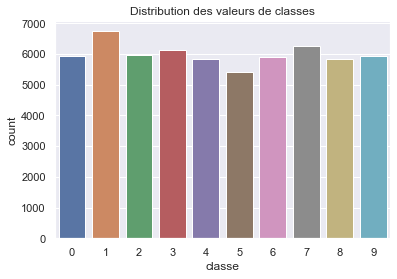

In [102]:
# 2.3
# valeurs relativement bien distribuées

label_series = pd.Series(label_DS)
balance_sample = list(label_series.value_counts(sort=False))
print("Occurence des labels de 0 à 9: " + str(balance_sample))

df = pd.DataFrame({'classe':label_series.values})
sns.set()
sns.countplot(x='classe',data=df).set_title("Distribution des valeurs de classes")

In [103]:
# 2.4
# 10% de test

img_train, img_test, lbl_train, lbl_test = train_test_split(image_matrix, label_DS, test_size=0.1)
print(img_train.shape,img_test.shape,lbl_train.shape,lbl_test.shape)

(54000, 784) (6000, 784) (54000,) (6000,)


In [104]:
#2.5
# Multi-layer Perceptron classifier which optimizes the log-loss function using LBFGS or stochastic gradient descent

mlp_clf = MLPClassifier(verbose=True, tol=0.1).fit(img_train, lbl_train)
mlp_pred = mlp_clf.predict(img_test)
print(classification_report(lbl_test,mlp_pred))

Iteration 1, loss = 3.44580312
Iteration 2, loss = 1.02107596
Iteration 3, loss = 0.52848459
Iteration 4, loss = 0.34887379
Iteration 5, loss = 0.26275580
Iteration 6, loss = 0.21278395
Iteration 7, loss = 0.17316115
Iteration 8, loss = 0.15417679
Iteration 9, loss = 0.13710632
Iteration 10, loss = 0.12911068
Iteration 11, loss = 0.11683921
Iteration 12, loss = 0.10996141
Iteration 13, loss = 0.09857140
Iteration 14, loss = 0.10512420
Iteration 15, loss = 0.10406088
Training loss did not improve more than tol=0.100000 for 10 consecutive epochs. Stopping.
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       594
           1       0.98      0.96      0.97       717
           2       0.92      0.96      0.94       574
           3       0.94      0.94      0.94       600
           4       0.96      0.96      0.96       595
           5       0.97      0.91      0.94       529
           6       0.96      0.98      0.97       594
      

In [106]:
# Random forest classifier which is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

rf_clf = RandomForestClassifier(verbose=True).fit(img_train, lbl_train)
rf_pred = rf_clf.predict(img_test)
print(classification_report(lbl_test,rf_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   59.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       594
           1       0.99      0.98      0.98       717
           2       0.94      0.98      0.96       574
           3       0.96      0.95      0.96       600
           4       0.97      0.98      0.98       595
           5       0.98      0.94      0.96       529
           6       0.98      0.99      0.98       594
           7       0.98      0.96      0.97       617
           8       0.95      0.97      0.96       590
           9       0.96      0.95      0.95       590

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

[Parallel